In [16]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import tidynamics

from mdhelper.algorithm import correlation
from mdhelper.plot.rcparam import update

update("acs", font_scaling=1.25, size_scaling=1.5)

rng = np.random.default_rng()

### Correlation functions

In [17]:
n_tests = 20
n_atoms = 5_000
n_atoms_test = np.sort(
    np.unique(
        np.concatenate(
            (2 ** np.arange(1, 13),
             np.logspace(0, np.log10(n_atoms + 1), 50, dtype=int))
        )
    )
)
n_frames = 50_000
n_frames_test = np.sort(
    np.unique(
        np.concatenate(
            (2 ** np.arange(1, 14),
             np.logspace(np.log10(2), np.log10(n_frames + 1), 50, dtype=int))
        )
    )
)

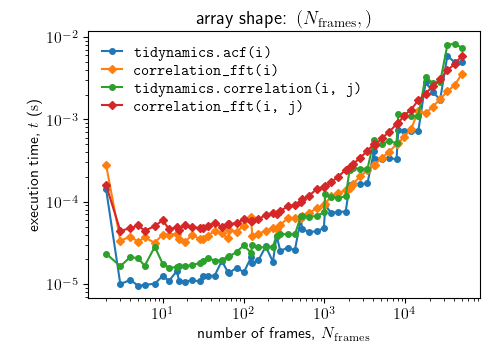

In [18]:
times = np.empty((2, 2, n_frames_test.shape[0])) # (module, algorithm, # frames)
for i, f in enumerate(n_frames_test):
    data_i = rng.random(f)
    data_j = rng.random(f)
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = tidynamics.acf(data_i)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = tidynamics.correlation(data_i, data_j)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_frames_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_frames_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_frames_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_frames_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of frames, $N_\mathrm{frames}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title("array shape: $(N_\mathrm{frames},)$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()

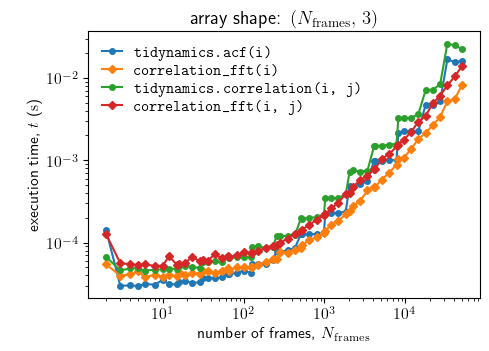

In [19]:
times = np.empty((2, 2, n_frames_test.shape[0])) # (module, algorithm, # frames)
for i, f in enumerate(n_frames_test):
    data_i = rng.random((f, 3))
    data_j = rng.random((f, 3))
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = tidynamics.acf(data_i)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0, vector=True)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = tidynamics.correlation(data_i, data_j)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0, vector=True)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_frames_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_frames_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_frames_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_frames_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of frames, $N_\mathrm{frames}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title("array shape: $(N_\mathrm{frames},\,3)$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()

In [ ]:
times = np.empty((2, 2, n_atoms_test.shape[0])) # (module, algorithm, # frames)
for i, a in enumerate(n_atoms_test):
    data_i = rng.random((512, a))
    data_j = rng.random((512, a))
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = np.stack(tuple(tidynamics.acf(data_i[:, j]) for j in range(a)), axis=1)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = np.stack(tuple(tidynamics.correlation(data_i[:, j], data_j[:, j]) for j in range(a)), axis=1)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_atoms_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_atoms_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_atoms_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_atoms_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of atoms, $N_\mathrm{atoms}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title(f"array shape: $(N_\mathrm{{frames}}=512,\,N_\mathrm{{atoms}})$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()

### Testing

In [13]:
import numba

@numba.jit(nopython=True)
def get_bin_edges(a, bins):
    bin_edges = np.zeros((bins+1,), dtype=np.float64)
    a_min = a.min()
    a_max = a.max()
    delta = (a_max - a_min) / bins
    for i in range(bin_edges.shape[0]):
        bin_edges[i] = a_min + i * delta

    bin_edges[-1] = a_max  # Avoid roundoff error on last point
    return bin_edges


@numba.jit(nopython=True)
def compute_bin(x, bin_edges):
    # assuming uniform bins for now
    n = bin_edges.shape[0] - 1
    a_min = bin_edges[0]
    a_max = bin_edges[-1]

    # special case to mirror NumPy behavior for last bin
    if x == a_max:
        return n - 1 # a_max always in last bin

    bin = int(n * (x - a_min) / (a_max - a_min))

    if bin < 0 or bin >= n:
        return None
    else:
        return bin


@numba.jit(nopython=True)
def numba_histogram(a, bins):
    hist = np.zeros((bins,), dtype=np.int64)
    bin_edges = get_bin_edges(a, bins)

    for x in a.flat:
        bin = compute_bin(x, bin_edges)
        if bin is not None:
            hist[int(bin)] += 1

    return hist, bin_edges

In [15]:
data = rng.random((10_000 * 9_999))
n_bins = 1_000
n_runs = 5

start = datetime.now()
for _ in range(n_runs):
    np.histogram(data, n_bins)
print((datetime.now() - start).total_seconds() / n_runs)

start = datetime.now()
for _ in range(n_runs):
    numba_histogram(data, n_bins)
print((datetime.now() - start).total_seconds() / n_runs)

0.749744
0.4885448
